Перед нами датасет с данными о продажах различных игр с указанием названия игры, платформы, на которой она продается, дата выпуска игры, жанр, продажи в млн. в Северной Америке, Европе, Японии и др.странах, оценка критиков, оценка пользователей и рейтинг. всего в датасете 16715 строк

Необходимо проанализировать данные и выявить закономерности и факторы, влияющие на успешность игры, для планирования продукта и рекламных кампаний, чтобы продукт был популярным и прибыльным. Выбрать наиболее успешные платформы, на которых игра будет с большей вероятностью приносить больше прибыли

Также необходимо проверить гипотезы, выдвинутые бизнессом, и дать ответ, есть ли статистически значимые различия.
гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

План действий.


1. Подготовка данных:
    
    1.1. привести названия столбцов в нужный регистр
    
    1.2. изменить типы данных в столбцах, где необходимо
    
    1.3. обработать пропуски
    
    1.4. посчитать сумарные продажи по регионам
    
2. Исследовательский анализ данных

    2.1. Сколько игр выпускалось в разные годы?
    
    2.2. Как менялись продажи по платформам? Выбрать платформы с наибольшими продажами и построить распределения по годам. Дать ответ, за какой срок появляются новые и исчезают старые платформы
    
    2.3. Выбрать актуальный период, позвоялющий сделать прогноз на 2017 год
    
    2.4. Оценить, какие платформы растут в продажах, а какие- падают. Выбрать несколько потенциально выгодных платформ
    
    2.5. Построить график боксплот по глобальным продажам игр в разбивке по платформам.
    
    2.5. Оценить, как влияют отзывы пользователей и критиков на продажи внутри 1 популярной платформы
    
    2.6. Построить диаграмму рассеяния и посчиать корреляцию между отзывами и продажами. Сделать вывод
    
    2.7. Соотнести полученный вывод с продажами на других платформах
    
    2.8. Посмотреть распределение игр по жанрам и оценить самые прибыльные жанры. Есть ли жанры с высокими и низкими продажами?
    
3. Составить портрет пользователя для каждого региона
    
    3.1. Для каждого региона определить топ-5 популярных платформ. описать различия в долях продаж
    
    3.2. Для каждого региона определить топ-5 популярных жанров. Пояснить разницу
    
    3.3. Определить, влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
4. Проверить 2 статистические гипотезы и сделать выводы

5. Сделать итоговый вывод с указанием влияющих факторов и рекомендаций для бизнесса, а также с выводами после стат.анализа гипотез.
  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***ЭТАП 1- ПОДГОТОВКА ДАННЫХ***

*изменим названия столбцов в соответсвии с правилами питон.*

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

*замена типов данных*

изменить тип данных необходимо в колонках Year_of_Release на формат int, User_Score на float. Остальные вроде ок. Сначала проверим, какие уникальные значения есть в этих колонках, чтобы сразу разобраться с ненужными значениями, если они есть

In [8]:
data.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

есть только пропуски. Посчитаем, сколько строк с пропусками по годам

In [9]:
data.year_of_release.isna().sum()

269

данных немного, как и чем из заменить- не ясно.Удалаяем

In [10]:
data.dropna(subset=['year_of_release'], inplace= True)

In [11]:
data.year_of_release.isna().sum()

0

In [12]:
data.year_of_release = data.year_of_release.astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


Теперь посмотрим колонку user_score. 

In [14]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
data.user_score.loc[data['user_score'] == 'tbd'].count()

2376

In [16]:
data.user_score.isna().sum()

6607

Значений достаточно много,почти 9 тысяч. Как их заполнить- неизвестно. Но они могут внести существенные корректировки в статистику. Поэтому заменим все tbd и пропуски на np.nan, т.к. у np.nan тип данных float, который нам и нужен

In [17]:
data.user_score = data.user_score.fillna(np.nan)

In [18]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

In [19]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Строк с пропусками (tbd) около половины. Посмотрим остальные данные на предмет пропусков, обработаем их и после подумаю, что делать с этим столбцом

In [20]:
data.user_score = data.user_score.astype('float64')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


остальные типы данных те, которые ожидаем

*обработка пропусков*

In [22]:
data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

пропусков в оценках достаточно много, но как их заполнить- неизвестно. поэтому оставим пропуски в оценках как есть. а вот 2 пропуска в name и genre легче удалить, т.к. это очень малые количества, трудозатраты на заполнения этих пропусков будут больше, чем выхлоп от их значений.

In [23]:
good_data = data.dropna(how='all', subset=['name'], inplace=True)

In [24]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Остальные пропуски оставляем нетронутыми

In [25]:
data.reset_index(drop=True,inplace= True)

Надеюсь на понимание. Во всем остальном проекте использовалась good_data. С нынешними исправлениями эту переменную можно было не вводить, но она есть, и чтобы не переправлять весь проект из-за имени просто следующей строкой переименую датафрейм

In [26]:
good_data = data.copy()

Запишем в новый столбец сумму всех продаж во всех регионах

In [27]:
good_data['all_reg_sales'] = good_data['na_sales'] + good_data['eu_sales'] + good_data['jp_sales'] + good_data['other_sales']

проверим на дубликаты

In [28]:
good_data.duplicated().sum()

0

In [29]:
nun_table = good_data[['year_of_release', 'critic_score','user_score', 'rating']].copy()

In [30]:
nun_table.critic_score =  nun_table.critic_score.isnull()*1

In [31]:
nun_table.user_score = nun_table.user_score.isnull()*1

In [32]:
nun_table.rating = nun_table.rating.isnull()*1

Text(0, 0.5, 'nan_count')

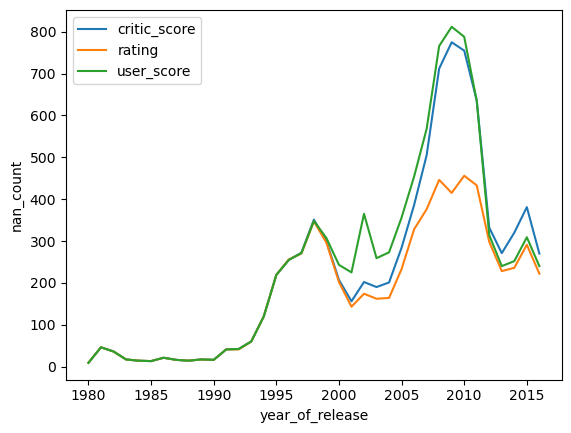

In [33]:
nun_table.pivot_table (index ='year_of_release', values = ('critic_score', 'user_score','rating'), aggfunc = 'sum' ).plot()
plt.ylabel('nan_count')

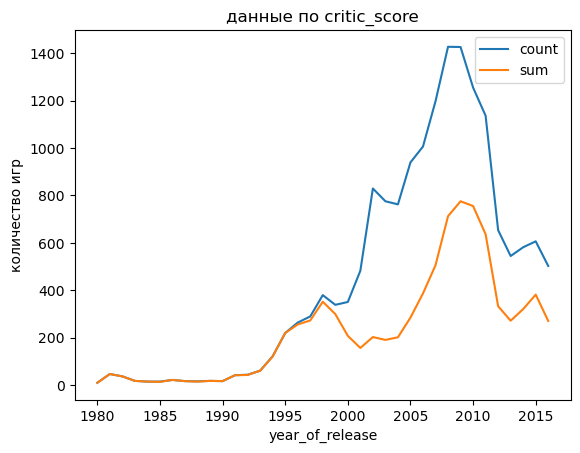

In [34]:
nun_table.pivot_table (index ='year_of_release', values = ('critic_score'), aggfunc = ('count','sum') ).plot();
plt.ylabel('количество игр');
plt.title('данные по critic_score');


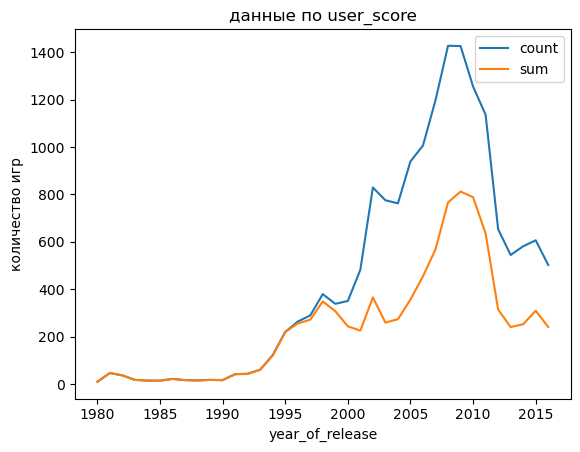

In [35]:
nun_table.pivot_table (index ='year_of_release', values = ('user_score'), aggfunc = ('count','sum') ).plot();
plt.ylabel('количество игр');
plt.title('данные по user_score');


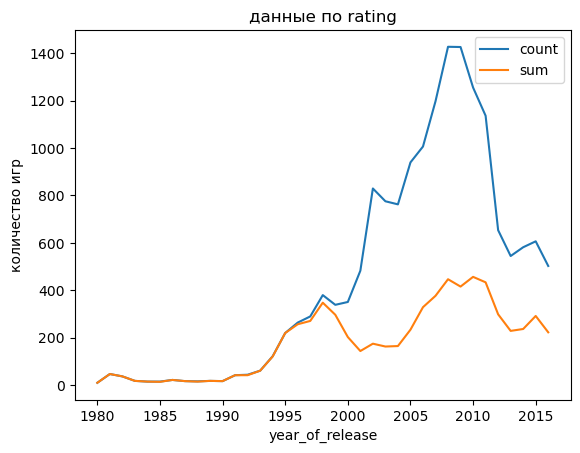

In [36]:
nun_table.pivot_table (index ='year_of_release', values = ('rating'), aggfunc = ('count','sum') ).plot();
plt.ylabel('количество игр');
plt.title('данные по rating');


Из графиков видно, что до 1996 года рейтингов ни у каких игр не было. Можно предположить, что в те года понятия рейтинг просто не существовало. Пропуски в остальные года могут быть также связаны с тем, что игра так и не получила никакой оценки, либо возможна случилась ошибка в выгрузке данных.

Обработка пропусков в данном датасете была следующей- по столбцу name строки удалила, т.к. строк было всего 2 и их удаление ни на что значимо не влияло. А пропуски в столбцах 'critic_score', 'user_score','rating' оставила, т.к. во-первых, мы ничем не можем их заменить, во-вторых, например, пропуски по столбцу rating может свидетельствовать о том, что данная игра просто не представлена на рынке США или Канады, а в-третьих игра также могла просто не "взлететь" и поэтому у нее нет оценок. Все это - информация, которую мы не можем отбрасывать.

In [37]:
# Посмотрим, что у нас осталось
temp = good_data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  all_reg_sales    16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

***ЭТАП 3- ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ***

*Оценим количество продаж игр по годам на разных рынках.*

In [38]:
pivot_year = good_data.pivot_table(index=['year_of_release'],
                                   values=['na_sales','eu_sales','jp_sales','other_sales','all_reg_sales'],
                                   aggfunc = 'sum'
                                  )

In [39]:
pivot_year

,all_reg_sales,eu_sales,jp_sales,na_sales,other_sales
year_of_release,,,,,
1980,11.38,0.67,0.00,10.59,0.12
1981,35.68,1.96,0.00,33.40,0.32
1982,28.88,1.65,0.00,26.92,0.31
1983,16.80,0.80,8.10,7.76,0.14
1984,50.35,2.10,14.27,33.28,0.70
1985,53.95,4.74,14.56,33.73,0.92
1986,37.08,2.84,19.81,12.50,1.93
1987,21.70,1.41,11.63,8.46,0.20
1988,47.21,6.59,15.76,23.87,0.99


Text(0.5, 1.0, 'ПРодажи на платформах по годам')

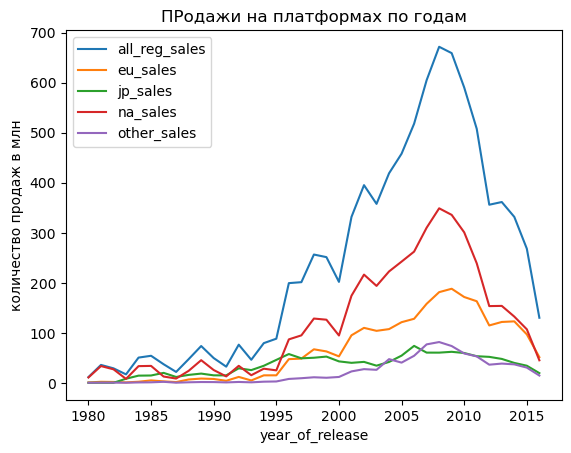

In [40]:
pivot_year.plot();
plt.ylabel('количество продаж в млн')
plt.title('ПРодажи на платформах по годам')

Из графика видим, что до 1995 года игры понемногу продавались, с 1995 по 2008 был резкий рост общего числа продаж( в 2000- небольшая просадка). Т.е. на текущий год можно сказать, что популярность игровых платформ падает, и скорее всего на следующий год в целом продаж может быть меньше, чем в 2017. Так как нас интересует прогноз на 2017 год, то,все платформы, которые на момент 2016 года прекратили свое существования для анализа нам не интересны. ПОэтому отберем платформы, у которых есть продажи на 2016 год.

Стоит отметить, что подобная картина харакетрна для всех рынков, кроме Японии.У них нет такого явного пика и спада. ПРодажи игр на платформах более-менее одинаковая во все года.


*Оценим, как менялись продажи у платформ по годам*

In [41]:
group_platform = good_data.groupby(['platform'])['all_reg_sales'].sum()

In [42]:
group_platform.sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_reg_sales, dtype: float64

Text(0.5, 1.0, 'Общее кол-во продаж по всем рынкам')

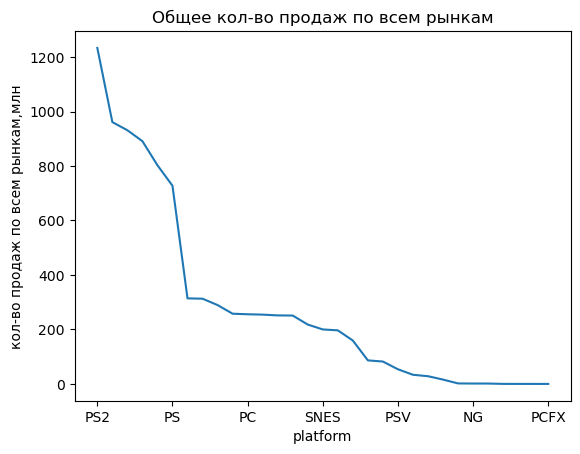

In [43]:
group_platform.sort_values(ascending=False). plot();
plt.ylabel('кол-во продаж по всем рынкам,млн')
plt.title ('Общее кол-во продаж по всем рынкам')

ПОлучили отсортированный по убыванию список платформ с суммарными продажами за весь период. Теперь оценим, как эти продажи распределялись по годам на топ-10 платформах

In [44]:
group_platform2 = good_data.pivot_table(index = ('platform','year_of_release'), values='all_reg_sales').reset_index()
print(group_platform2)

    platform  year_of_release  all_reg_sales
0       2600             1980       1.264444
1       2600             1981       0.775652
2       2600             1982       0.802222
3       2600             1983       0.530909
4       2600             1984       0.270000
..       ...              ...            ...
233       XB             2008       0.180000
234     XOne             2013       0.997895
235     XOne             2014       0.886393
236     XOne             2015       0.751750
237     XOne             2016       0.300575

[238 rows x 3 columns]


In [45]:
group_platform2

,platform,year_of_release,all_reg_sales
0,2600,1980,1.264444
1,2600,1981,0.775652
2,2600,1982,0.802222
3,2600,1983,0.530909
4,2600,1984,0.270000
...,...,...,...
233,XB,2008,0.180000
234,XOne,2013,0.997895
235,XOne,2014,0.886393
236,XOne,2015,0.751750


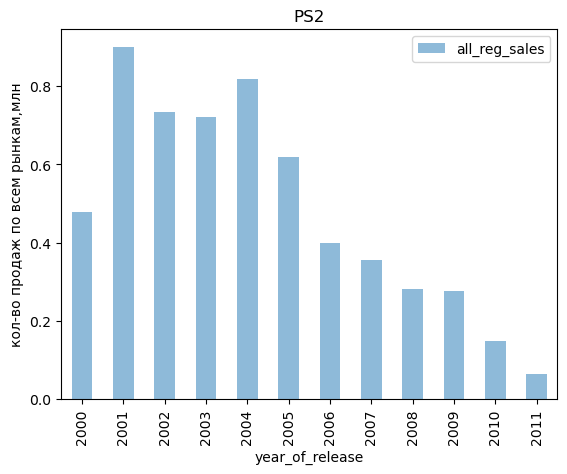

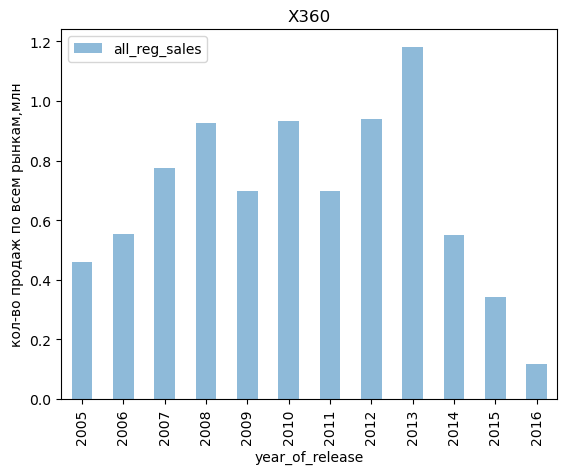

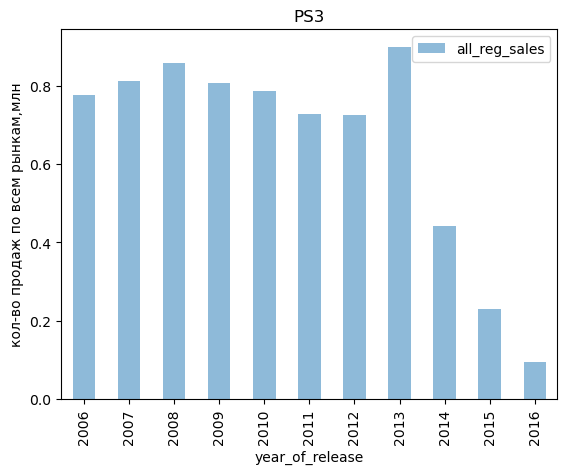

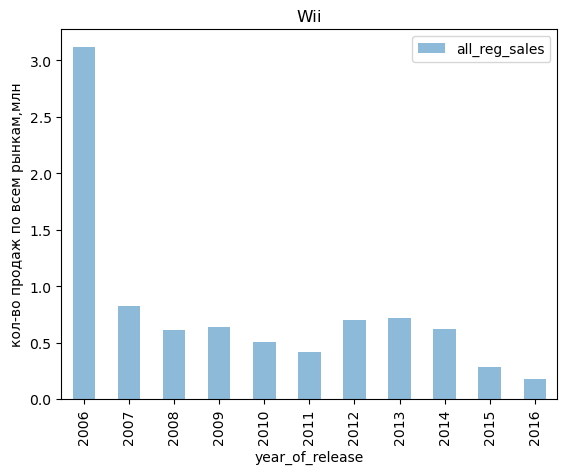

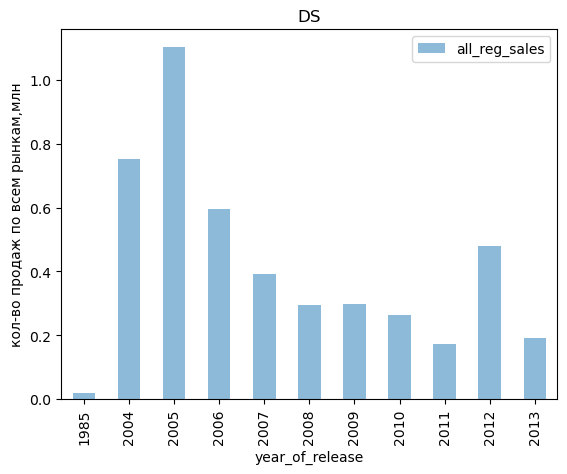

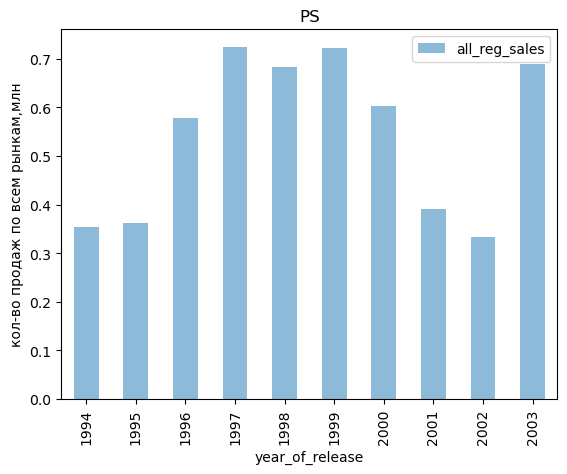

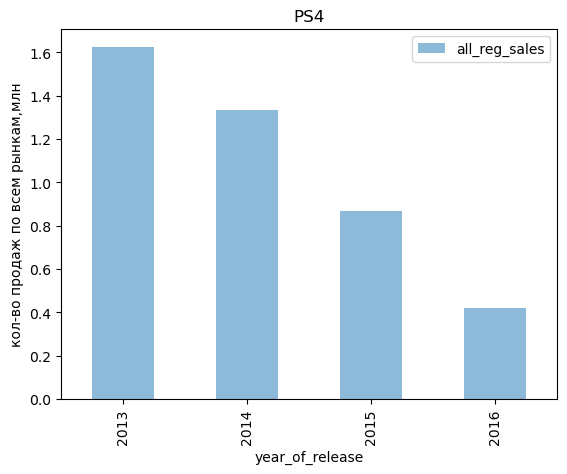

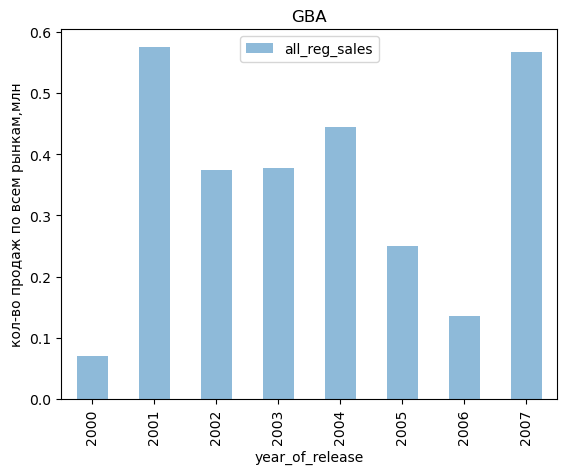

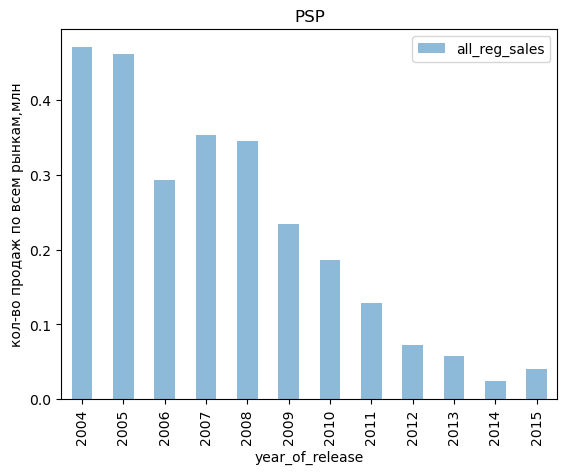

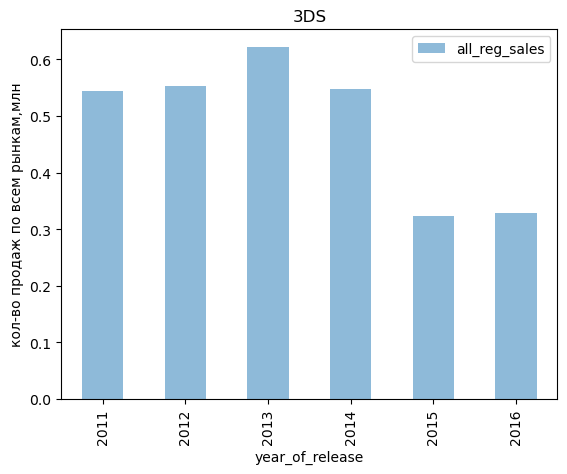

In [46]:
platform_list = ['PS2','X360','PS3','Wii','DS','PS','PS4','GBA','PSP','3DS']
for name in platform_list:
    group_platform2[group_platform2['platform'] == name].plot(kind='bar', x= 'year_of_release', y='all_reg_sales', title =name, alpha=0.5)
    plt.ylabel('кол-во продаж по всем рынкам,млн')
       

In [47]:
good_data[(good_data['platform']=='DS')& (good_data['year_of_release']==1985) ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_reg_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [48]:
good_data.loc[15704, 'year_of_release'] = 2005

In [49]:
good_data[(good_data['platform']=='DS')& (good_data['year_of_release']==1985) ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_reg_sales


Посмотрим как выглядят продажи платформ на одном графике.

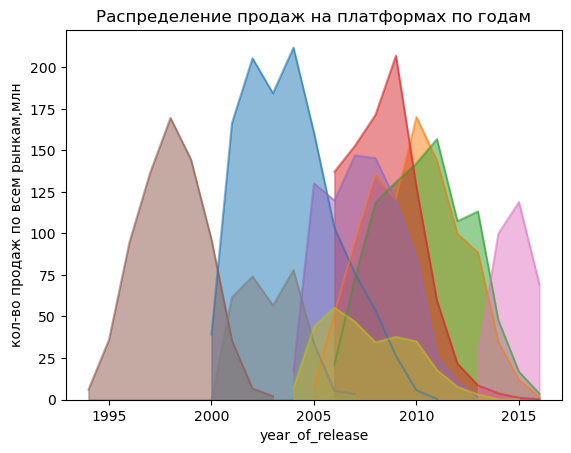

In [50]:
platform_list2 = ['PS2','X360','PS3','Wii','DS','PS','PS4','GBA','PSP']
for name in platform_list2:
    good_data.loc[good_data['platform'] == name].groupby(['year_of_release'])['all_reg_sales'].sum().plot(kind='area', alpha=0.5)
    plt.ylabel('кол-во продаж по всем рынкам,млн')
    plt.title('Распределение продаж на платформах по годам')

Графики напоминают нормальное распределение. Сначала рост продаж, потом пик, а после него - спад и уход платформы с рынка. У некоторых платформ "жизнь" начинается сразу с большого числа продаж(переход с предыдущей платформы или хорошая маркетинговая кампания?), но после также продажи падают и платформа уходит с рынка.

Оценим первый и последний года у каждой платформы, когда о них была информация, посчитаем средний срок жизни платформы

In [51]:
uniq_platform_list = good_data['platform'].unique()
live_med=0
i=0
for name in uniq_platform_list:
    min_year = good_data.loc[good_data['platform'] == name]['year_of_release'].min()
    max_year = good_data.loc[good_data['platform'] == name]['year_of_release'].max()
    live_time = max_year-min_year +1
    print(name, min_year, max_year, 'срок "жизни" платформы:',live_time)
    if  good_data.loc[good_data['platform'] == name]['year_of_release'].max()!=2016:
        live_med +=live_time
        i +=1
mean_val = live_med/i
print('cреднее время жизни платформы:', mean_val)

Wii 2006 2016 срок "жизни" платформы: 11
NES 1983 1994 срок "жизни" платформы: 12
GB 1988 2001 срок "жизни" платформы: 14
DS 2004 2013 срок "жизни" платформы: 10
X360 2005 2016 срок "жизни" платформы: 12
PS3 2006 2016 срок "жизни" платформы: 11
PS2 2000 2011 срок "жизни" платформы: 12
SNES 1990 1999 срок "жизни" платформы: 10
GBA 2000 2007 срок "жизни" платформы: 8
PS4 2013 2016 срок "жизни" платформы: 4
3DS 2011 2016 срок "жизни" платформы: 6
N64 1996 2002 срок "жизни" платформы: 7
PS 1994 2003 срок "жизни" платформы: 10
XB 2000 2008 срок "жизни" платформы: 9
PC 1985 2016 срок "жизни" платформы: 32
2600 1980 1989 срок "жизни" платформы: 10
PSP 2004 2015 срок "жизни" платформы: 12
XOne 2013 2016 срок "жизни" платформы: 4
WiiU 2012 2016 срок "жизни" платформы: 5
GC 2001 2007 срок "жизни" платформы: 7
GEN 1990 1994 срок "жизни" платформы: 5
DC 1998 2008 срок "жизни" платформы: 11
PSV 2011 2016 срок "жизни" платформы: 6
SAT 1994 1999 срок "жизни" платформы: 6
SCD 1993 1994 срок "жизни" пл

Итак, продажи на всех платформах имеют примерно одинаковый характер. Сначала рост продаж с каждым годом, а после- снижение продаж и платформа умирает. Срок жизни игровой платформы в среднем 7 лет. Новые платформы появлялись чуть ли не каждый год. На данный момент 9 игровых платформ имели продажи в 2016 году, значит с большой вероятностью они и будут на рынке в 2017 году. Значит нам стоит рассматривать именно их.
Для построения анализа на 2017 год нужно взять последние 3 года для анализа- 2014, 2015, 2016. Однако, так как мы не уверены, полная ли информация у нас есть за 2016 год, думаю, нужно еще взять для анализа 2013 год.

Итак, для следующего анализа нам нужны платформы PSV,WiiU,XOne,PC,3DS,PS4,PS3,Wii,X360. Именно они являются наиболее интересующими нас платформами, которые с наибольшей вероятностью будут на рынке в 2017 году. Теперь нужно оценить, какие платфоормы потенциально более выгодны для продажи на них игр компании. Т.е. их продажи либо растут либо находятся на пике.

*Оценим, как обстоят дела с продажами у выбранных нами платформ*
Запишем в новй датафрейм нужные даные и будем работать с ним.

In [52]:
platforms_in17 = ['PSV','WiiU','XOne','PC','3DS','PS4','PS3','Wii','X360']
predict_data =good_data.loc[(good_data['platform'].isin(platforms_in17))&(good_data['year_of_release']>2012) ]


In [53]:
predict_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_reg_sales
count,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,990.000000,1189.000000,2158.000000
mean,2014.521316,0.202567,0.181284,0.063712,0.055519,72.021212,6.587300,0.503082
std,1.077979,0.555981,0.520312,0.237777,0.168258,12.847655,1.608191,1.253867
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.040000
50%,2015.000000,0.030000,0.030000,0.010000,0.010000,74.000000,7.000000,0.120000
75%,2015.000000,0.160000,0.140000,0.050000,0.040000,81.000000,7.800000,0.420000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


Напишем функцию, которая посчитает количество продаж по каждой платформе в 2013, 2014, 2015 и 2016 годах, вычислит разницу между продажами в эти годы и выведет итог- продажи растут или продажи падают. 2016 учитывать не буду, т.к. 

In [54]:
def four_years_sales(platform_name):
    def_data = predict_data.query('platform == @platform_name')
    year13 = def_data.loc[def_data['year_of_release']== 2013]['all_reg_sales'].sum()
    year14 = def_data.loc[def_data['year_of_release']== 2014]['all_reg_sales'].sum()
    year15 = def_data.loc[def_data['year_of_release']== 2015]['all_reg_sales'].sum()
    year16 = def_data.loc[def_data['year_of_release']== 2016]['all_reg_sales'].sum()
    if year13 > year14 and year14 > year15:
        return ('Продажи на платформе',name,'падают. Общее количество продаж за 2013, 2014, 2015 и 2016 года:',year13,year14,year15,year16)
    elif year13 <= year14 and year14 >= year15:
        return ('Продажи на платформе',name,'на пике. Общее количество продаж за 2013, 2014, 2015 и 2016 года:',year13,year14,year15,year16)
    elif year13 <year14 and year14 < year15:
        return ('Продажи на платформе',name,'растут. Общее количество продаж за 2013, 2014, 2015 и 2016 года:',year13,year14,year15,year16)
    else:
        return ('черт его знает')

In [55]:
for name in platforms_in17:
    print(four_years_sales(name))

('Продажи на платформе', 'PSV', 'на пике. Общее количество продаж за 2013, 2014, 2015 и 2016 года:', 10.589999999999998, 11.900000000000002, 6.25, 4.25)
('Продажи на платформе', 'WiiU', 'на пике. Общее количество продаж за 2013, 2014, 2015 и 2016 года:', 21.65, 22.03, 16.350000000000005, 4.6000000000000005)
('Продажи на платформе', 'XOne', 'растут. Общее количество продаж за 2013, 2014, 2015 и 2016 года:', 18.959999999999997, 54.06999999999999, 60.14, 26.15000000000001)
('Продажи на платформе', 'PC', 'на пике. Общее количество продаж за 2013, 2014, 2015 и 2016 года:', 12.379999999999997, 13.28, 8.52, 5.249999999999999)
('Продажи на платформе', '3DS', 'падают. Общее количество продаж за 2013, 2014, 2015 и 2016 года:', 56.569999999999986, 43.75999999999999, 27.78000000000001, 15.139999999999999)
('Продажи на платформе', 'PS4', 'растут. Общее количество продаж за 2013, 2014, 2015 и 2016 года:', 25.990000000000002, 100.00000000000001, 118.89999999999999, 69.25)
('Продажи на платформе', 'PS

Итого мы видим, что лидируют по продажам платформы PS4, XOne.У них продажи показывают рост. У PS4 продажи за 2015 и 2106 года- 118,90 млн и 69,25 млн. У XOne продажи 60.14млн в 2015 году и 26.15 в 2016 году. Так же можно расмотреть платформы WiiU, PSV, PC. Лучше всего продажи идут на платформе WiiU - 16,35 в 2015 году и 4,6 в 2016. У платформ PC и PSV продажи в районе 7 млн. за 2015 год и около 4 за 2016 года.  Это платформы, у которых нет явного падения и на данный момент их продажи находятся на определенном плато или пике. Их если маркетологи не придумают, как поддерживать платформу, то дальше начнется спад продаж на этих платформах. Кстати, продажи на всех платформах в последнее время падают, возможно это связано с оттоком любителей игр с данных игровых платформ куда-то еще, может, онлайн игры? 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [56]:
predict_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_reg_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


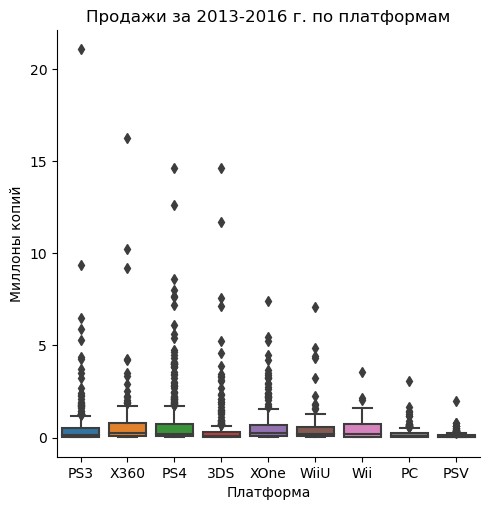

In [57]:
sns.catplot(x='platform',y='all_reg_sales', kind='box', data=predict_data);
plt.title('Продажи за 2013-2016 г. по платформам');
plt.xlabel('Платформа');
plt.ylabel('Миллоны копий');



(0.0, 1.75)

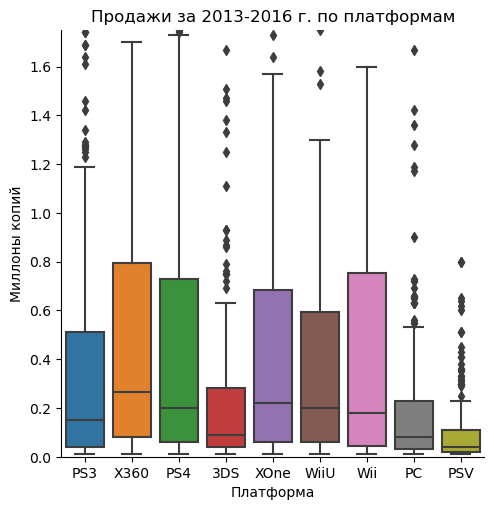

In [58]:
sns.catplot(x='platform',y='all_reg_sales', kind='box', data=predict_data);
plt.title('Продажи за 2013-2016 г. по платформам');
plt.xlabel('Платформа');
plt.ylabel('Миллоны копий');
plt.ylim (0,1.75)


Из графиков боксплот мы видим, что медианы продаж на всех платформах находятся примерно на уровне 0,2 млн. продаж в год. Меньше всего на платформе PSV, там менее 0,1 млн. Однако по общим выбросам (из первого графика), мы можем сделать вывод, что на каждой платфоме есть свои успешные игры, которын продались десятками миллионов. Особенно выделяются платформы PS3, X360, PS4, 3DS

Посмотрим, как влияют на продажи внутри одной популярной платформы (я взяла Wiiu) отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

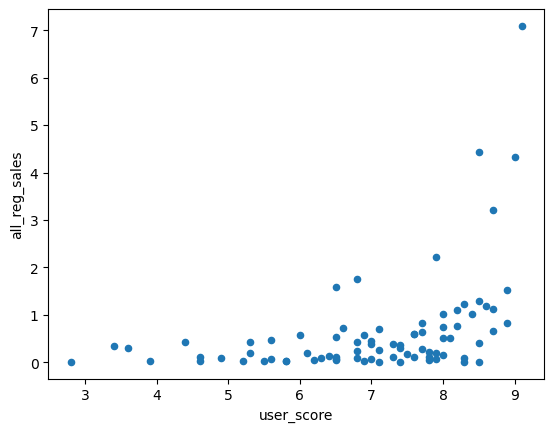

In [59]:
wiiu_platform =predict_data.loc[predict_data['platform']=='WiiU']
wiiu_platform.plot(x='user_score', y='all_reg_sales', kind='scatter');

In [60]:
wiiu_platform['user_score'].corr(wiiu_platform['all_reg_sales'])

0.4193304819266187

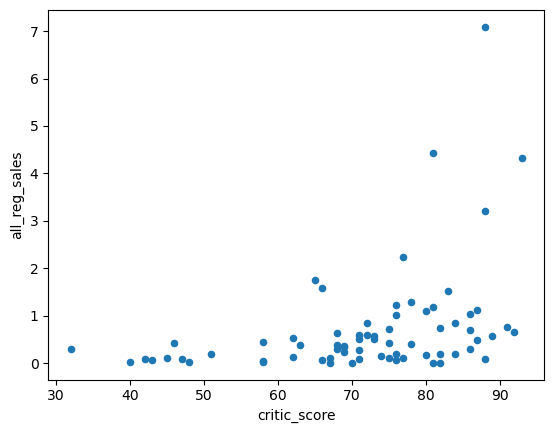

In [61]:
wiiu_platform.plot(x='critic_score', y='all_reg_sales',kind='scatter');

In [62]:
wiiu_platform['critic_score'].corr(wiiu_platform['all_reg_sales'])

0.3764149065423912

Исходя из полученных корреляций можно сделать вывод, что зависимости между отзывами пользователей и критиков и продажами слабые (0,4 и 0,35). Т.о. можем сделать вывод,что отзывы пользователей и критиков слабо влияют на продажи.

Построим графики и посчитаем коэффициенты корреляции для остальных платформ.

PS3
0.0023944027357566907
X360
-0.011742185147181351
PS4
-0.03195711020455643
3DS
0.24150411773563016
XOne
-0.06892505328279416
WiiU
0.4193304819266187
Wii
0.6829417215362368
PC
-0.09384186952476749
PSV
0.0009424723319108626


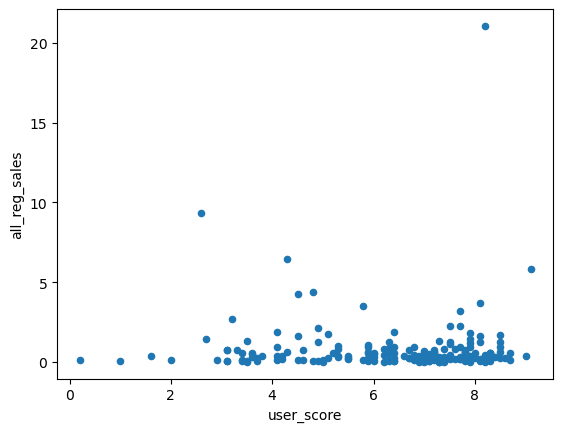

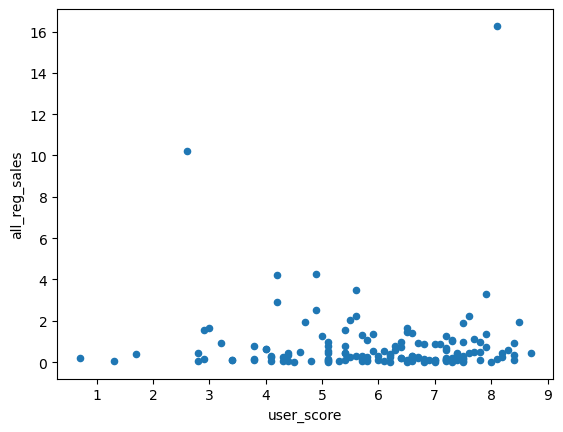

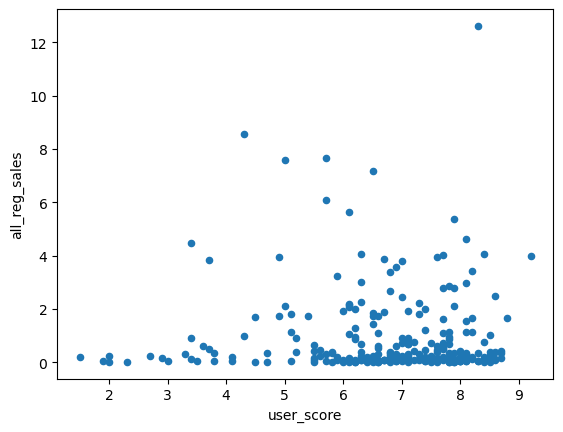

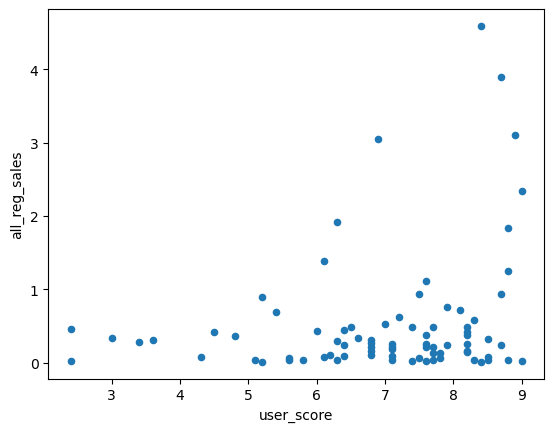

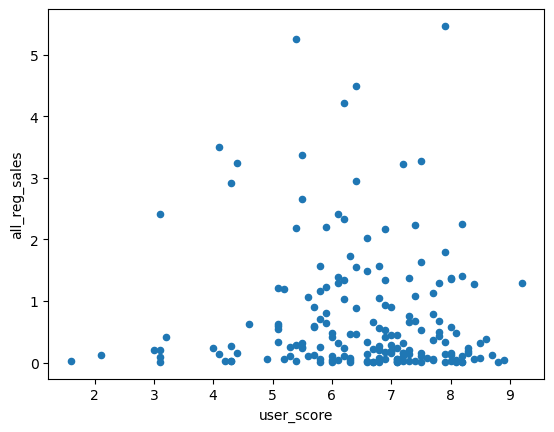

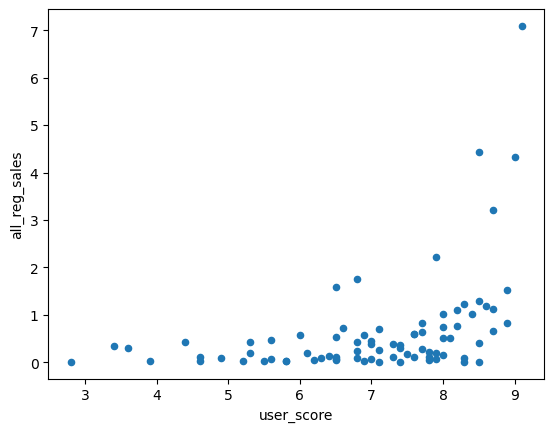

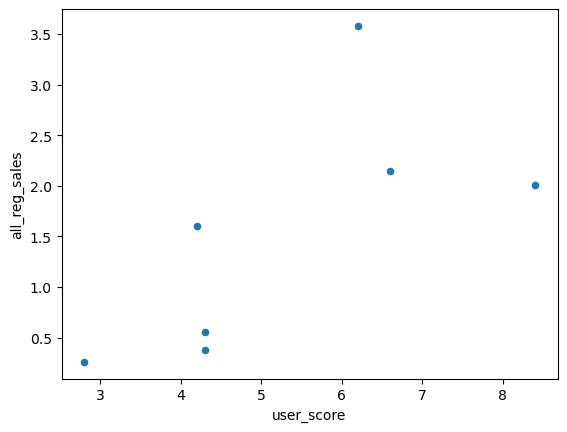

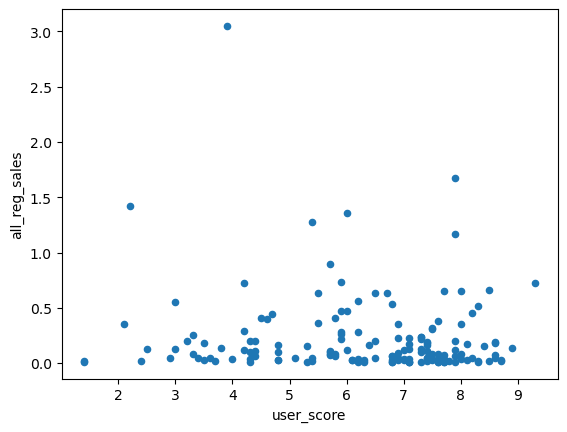

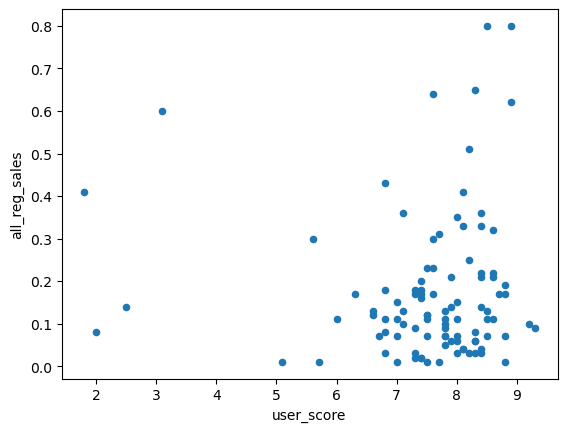

In [63]:
platform_list5 = predict_data['platform'].unique()
for name in platform_list5:
    cor_platform = predict_data.loc[predict_data['platform']==name]
    print (name)
    cor_platform.plot(x='user_score', y='all_reg_sales', kind='scatter');
    print(cor_platform['user_score'].corr(cor_platform['all_reg_sales']))
    

PS3
0.3342853393371919
X360
0.3503445460228664
PS4
0.4065679020617816
3DS
0.3570566142288103
XOne
0.4169983280084017
WiiU
0.3764149065423912
Wii
nan
PC
0.1960302829436937
PSV
0.2547423503068656


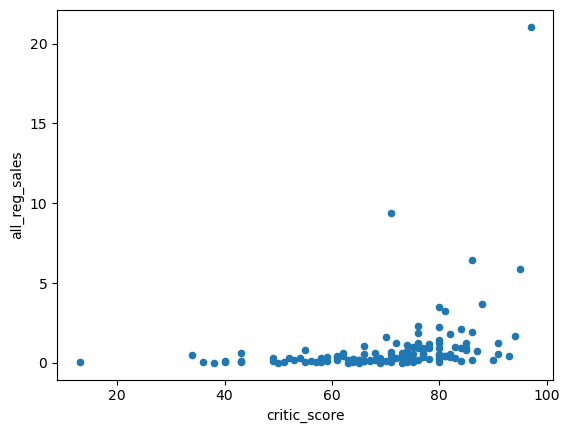

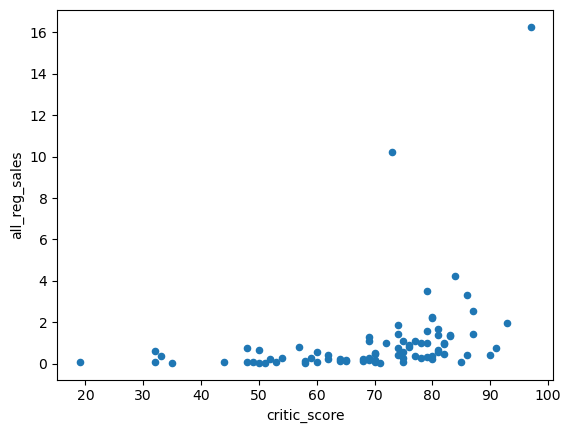

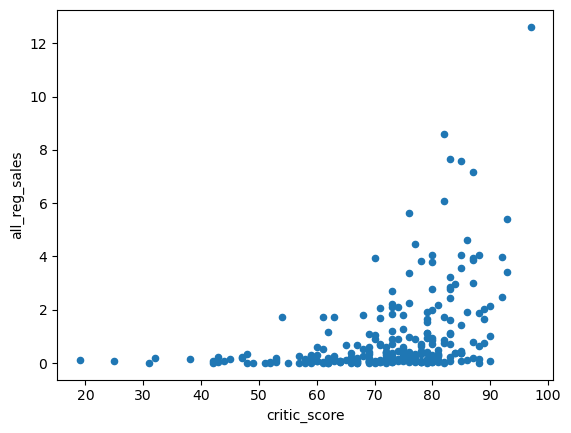

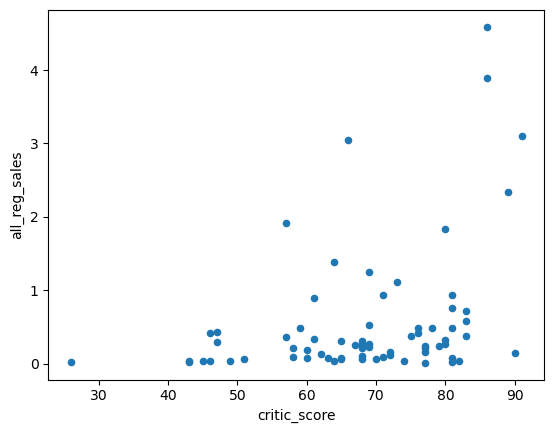

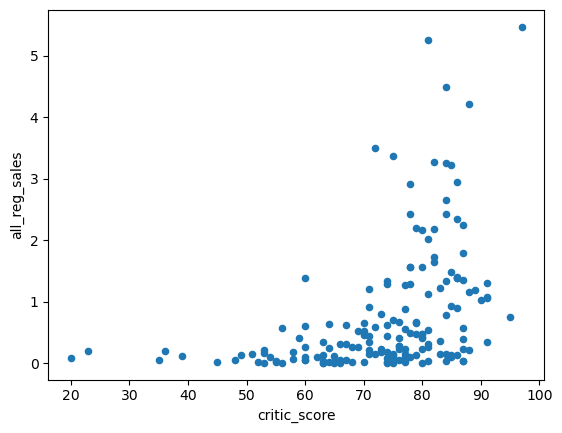

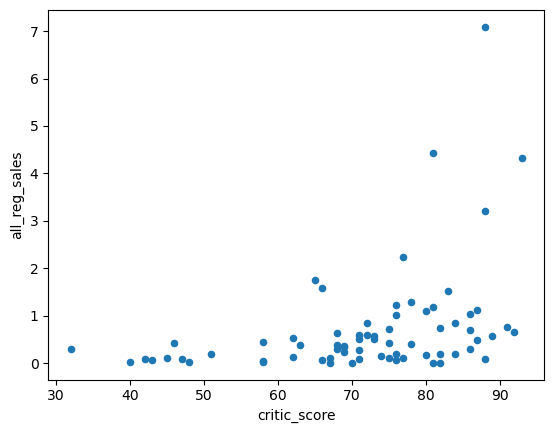

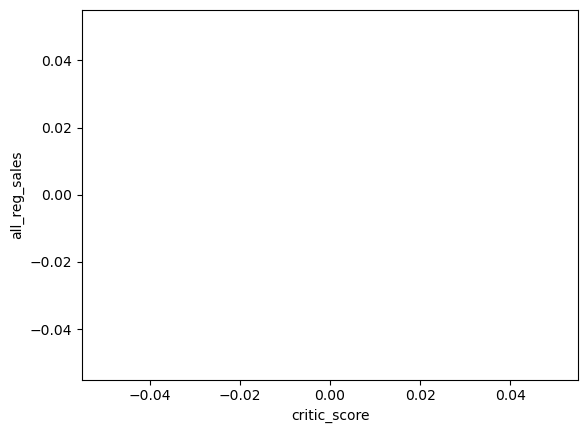

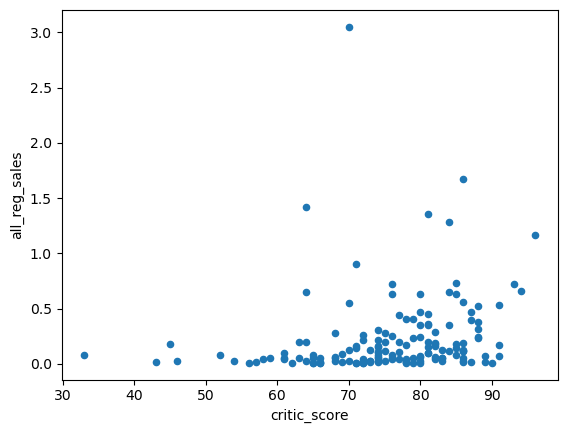

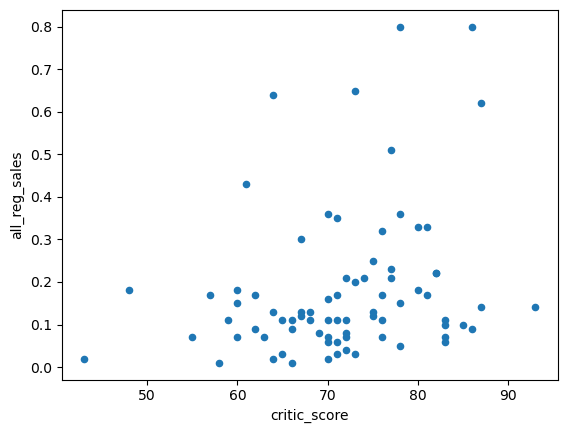

In [64]:
for name in platform_list5:
    cor_platform = predict_data.loc[predict_data['platform']==name]
    print (name)
    cor_platform.plot(x='critic_score', y='all_reg_sales', kind='scatter');
    print(cor_platform['critic_score'].corr(cor_platform['all_reg_sales']))
    

По всем платформам история похожа. Оценки пользователей и критиков слабо влияют на продажи. Хотя оценки критиков все же имеют немного более существенный вес. Есть одно выибвающееся значение на платформе Wii, там есть средняя корреляция продаж и отзывов пользователей - 0,68

*Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*


(0.0, 5.0)

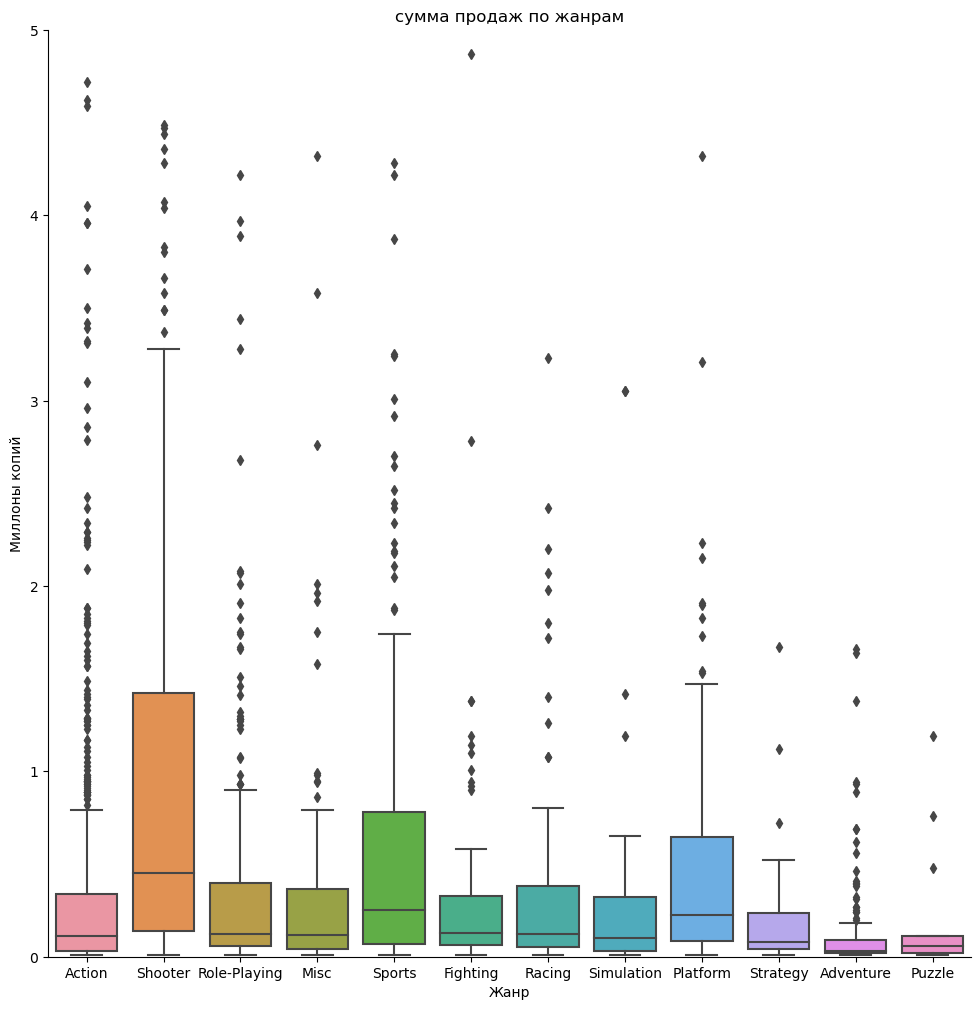

In [65]:
sns.catplot(x='genre', y='all_reg_sales', kind='box', data=predict_data, height=10);
plt.title('сумма продаж по жанрам');
plt.xlabel('Жанр');
plt.ylabel('Миллоны копий');
plt.ylim(0,5)


Да, получается достаточно интересно. Еще отдельно хочется посмотреть данные на гистограмме по сумме продаж и по медиане 

In [66]:
pivot_predict = predict_data.pivot_table(index= 'genre', values = 'all_reg_sales', aggfunc = ['sum','mean']).reset_index()
pivot_predict.columns = ['genre','sum','mean']
pivot_predict.sort_values(by='sum', ascending=False)

,genre,sum,mean
0,Action,320.51,0.426210
8,Shooter,232.98,1.245882
10,Sports,149.93,0.720817
7,Role-Playing,144.86,0.508281
3,Misc,62.57,0.428562
4,Platform,41.94,0.582500
6,Racing,39.89,0.469294
2,Fighting,35.29,0.446709
1,Adventure,22.90,0.108531
9,Simulation,21.55,0.353279


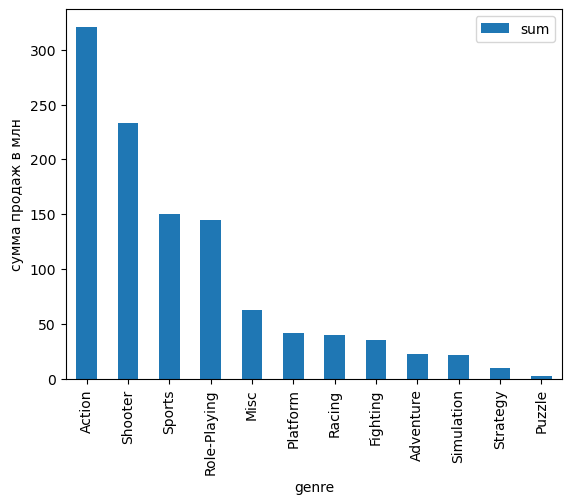

In [67]:
pivot_predict.sort_values(by='sum', ascending=False).plot(x = 'genre',y='sum',kind='bar');
plt.ylabel('сумма продаж в млн');

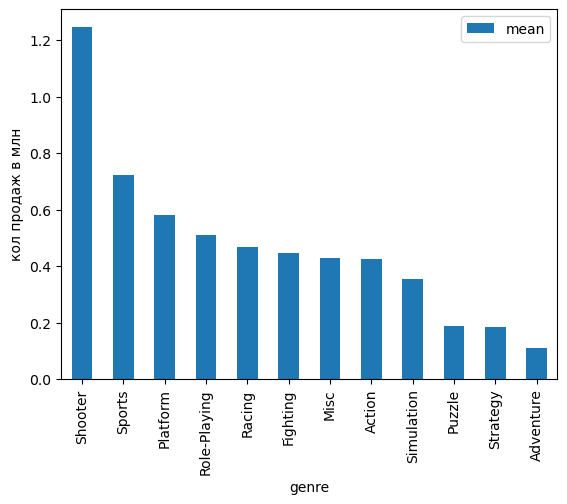

In [68]:
pivot_predict.sort_values(by='mean', ascending=False).plot(x = 'genre',y='mean',kind='bar');
plt.ylabel('кол продаж в млн');

Самыми популярными топ-5 жанрами по сумме продаж являются Action, Shooter, Sports,Role-Playing, и Misc.У них наибольшее количество продаж в сумме. а вот в антирейтинг-5 входят пазлы, стратегии, бродилки, симуляторы, и сражения. Меньше всего поклонников у пазлов.
А вот по медианным количествам продаж лидирую Shooter, на втором месте с большим отрывом Sports, далее Platform, Role-Playing, и Racing. Т.е. это наиболее стабильно продающиеся жанры на всех платформах

***Этап 3 - Составить портрет пользователя для каждого региона***

Посмотрим какие платформы в каких регионах популярны.

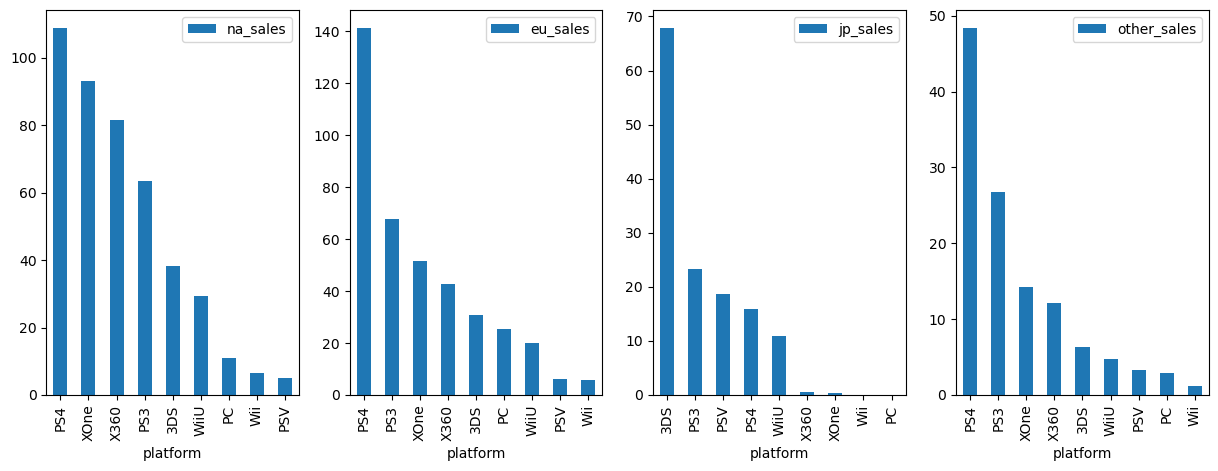

In [69]:
fig,ax = plt.subplots(figsize=(15,5), nrows=1, ncols=4)
(predict_data
 .pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values('na_sales', ascending =False).plot(kind='bar', ax=ax[0])
);
(predict_data
 .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values('eu_sales', ascending =False).plot(kind='bar',ax=ax[1])
);
(predict_data
 .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values('jp_sales', ascending =False).plot(kind='bar',ax=ax[2])
);
(predict_data
 .pivot_table(index='platform', values='other_sales', aggfunc='sum')
 .sort_values('other_sales', ascending =False).plot(kind='bar',ax=ax[3])
);

По графикам можем найти топ-5 платформ на разных рынках. Посмотрим подробнее, какой процент от рынка занимает каждая платформа на каждом рынке.

In [70]:
na_top5= ['PS4','XOne','X360','3DS','PS3']
for name in na_top5:
    all_na = predict_data['na_sales'].sum()
    name_sum = predict_data.loc[good_data['platform']== name,'na_sales'].sum()
    platform_part = name_sum/all_na*100
    print('Доля продаж платформы',name,'составляет %s%%'% platform_part)

Доля продаж платформы PS4 составляет 24.875325982522764%
Доля продаж платформы XOne составляет 21.302100013725575%
Доля продаж платформы X360 составляет 18.680514251727132%
Доля продаж платформы 3DS составляет 8.73861920666148%
Доля продаж платформы PS3 составляет 14.526238733586494%


In [71]:
eu_top5= ['PS4','XOne','PS3','PC','3DS']
for name in eu_top5:
    all_eu = predict_data['eu_sales'].sum()
    name_sum = predict_data.loc[(predict_data['platform']== name),'eu_sales'].sum()
    platform_part = name_sum/all_eu*100
    print('Доля продаж платформы',name,'составляет %s%%'% platform_part)

Доля продаж платформы PS4 составляет 36.06502901255081%
Доля продаж платформы XOne составляет 13.187290713427572%
Доля продаж платформы PS3 составляет 17.33340149791672%
Доля продаж платформы PC составляет 6.482451880064416%
Доля продаж платформы 3DS составляет 7.913908131182741%


In [72]:
jp_top5= ['3DS','PS4','PSV','PS3','WiiU']
for name in jp_top5:
    all_jp = predict_data['jp_sales'].sum()
    name_sum = predict_data.loc[(predict_data['platform']== name),'jp_sales'].sum()
    platform_part = name_sum/all_jp*100
    print('Доля продаж платформы',name,'составляет %s%%'% platform_part)

Доля продаж платформы 3DS составляет 49.3199505418576%
Доля продаж платформы PS4 составляет 11.608116953960291%
Доля продаж платформы PSV составляет 13.52098334424322%
Доля продаж платформы PS3 составляет 16.98305331296822%
Доля продаж платформы WiiU составляет 7.913302785657139%


In [73]:
other_top5= ['PS4','XOne','PS3','X360','3DS']
for name in other_top5:
    all_other = predict_data['other_sales'].sum()
    name_sum = good_data.loc[(good_data['year_of_release'] > 2013)&(good_data['platform']== name),'other_sales'].sum()
    platform_part = name_sum/all_other*100
    print('Доля продаж платформы',name,'составляет %s%%'% platform_part)

Доля продаж платформы PS4 составляет 37.12544862699273%
Доля продаж платформы XOne составляет 10.44987897504382%
Доля продаж платформы PS3 составляет 7.8207161338786415%
Доля продаж платформы X360 составляет 3.6307486854185793%
Доля продаж платформы 3DS составляет 3.071529922377097%


На рынках Северной Америки, Европы и других, самой популярной платформой является PS4. Она занимает большую часть рынков- 34,7, 48,04 и 54,49%. На втором месте платформа XOne- 28,61% на рынке Северной Америки, 17,08% на рынке Европы и 15,34% на рынке остальных регионов.

На рынке Латинской Америки 3 место занимает платформа X360= 9,96%, 4 - 3DS=7,97%, 5 место у платформы PS3 = 7,76%
На рынке Европы 3 место занимает платформа PS3= 9,43%, 4 - PC=6,64%, 5 место у платформы 3DS = 5,96%
На рынке остальных регионов 3 место занимает платформа PS3= 11,48%, 4 - X360=5,33%, 5 место у платформы 3DS = 4,51%


На рынке Японии ситуация немного другая. PS4 занимает второе место и 16,13%, уступая конкуренту 3DS- 47.52%. На третьем месте платформа PSV- 15,62%, на четвертом платформа PS3 = 12,05%, на пятом- платформа WiiU=7,85%

Теперь посмотрим, на каком рынке какие жанры популярны.

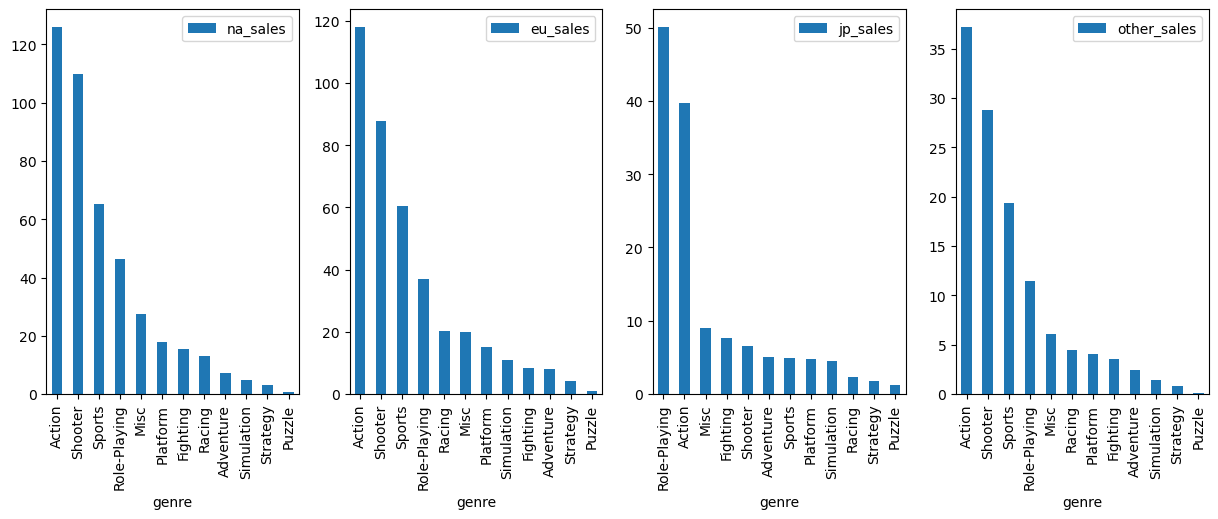

In [74]:
fig,ax = plt.subplots(figsize=(15,5), nrows=1, ncols=4)
(predict_data 
 .pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values('na_sales', ascending =False).plot(kind='bar', ax=ax[0])
);
(predict_data
 .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values('eu_sales', ascending =False).plot(kind='bar',ax=ax[1])
);
(predict_data
 .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values('jp_sales', ascending =False).plot(kind='bar',ax=ax[2])
);
(predict_data
 .pivot_table(index='genre', values='other_sales', aggfunc='sum')
 .sort_values('other_sales', ascending =False).plot(kind='bar',ax=ax[3])
);

теперь построим диаграмму pie

<AxesSubplot:title={'center':'Other'}, ylabel='other_sales'>

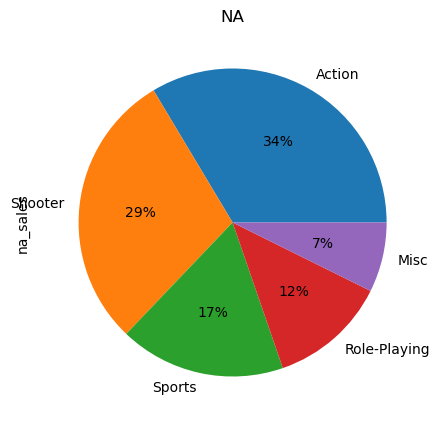

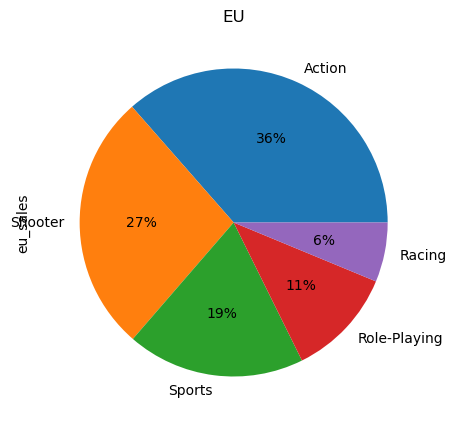

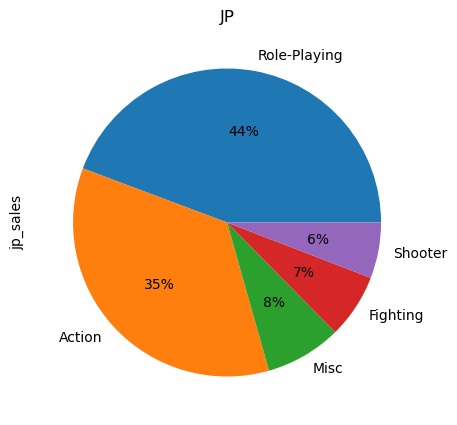

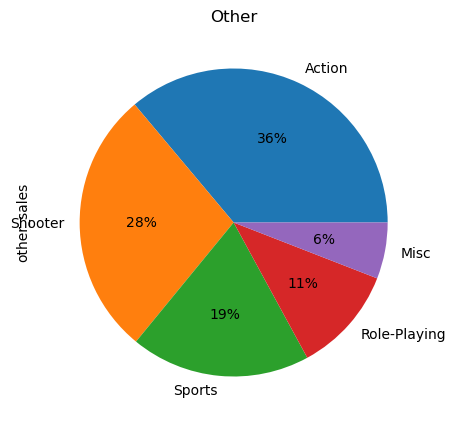

In [75]:
na_sales = predict_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_sales.plot(kind='pie',y='na_sales', autopct='%1.0f%%', legend=False, title = 'NA', figsize=(5, 5))

eu_sales = predict_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_sales.plot(kind='pie',y='eu_sales', autopct='%1.0f%%', legend=False, title = 'EU', figsize=(5, 5))

jp_sales = predict_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_sales.plot(kind='pie',y='jp_sales', autopct='%1.0f%%', legend=False, title = 'JP', figsize=(5, 5))

other = predict_data.pivot_table(index='genre', values='other_sales', aggfunc='sum').nlargest(5, 'other_sales')
other.plot(kind='pie',y='other_sales', autopct='%1.0f%%', legend=False, title = 'Other', figsize=(5, 5))


Теперь сделаем диаграмму для Платформ

<AxesSubplot:title={'center':'Other'}, ylabel='other_sales'>

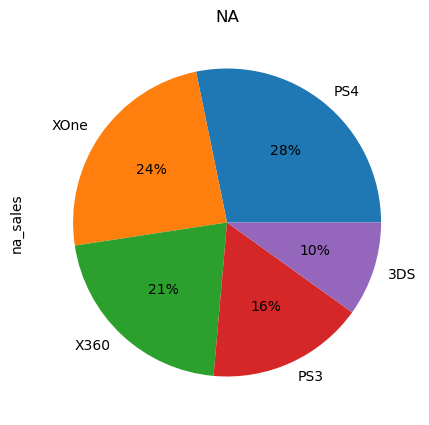

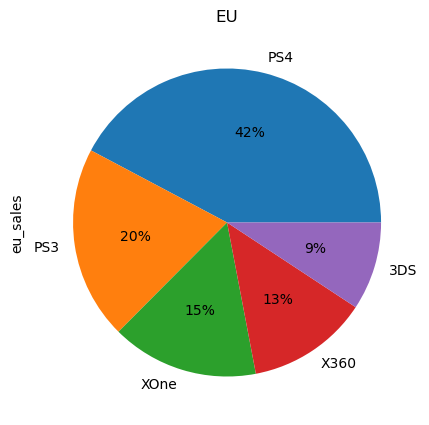

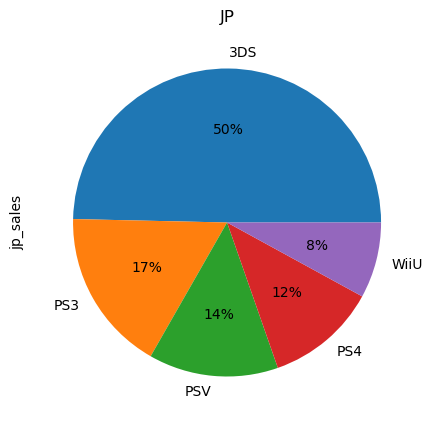

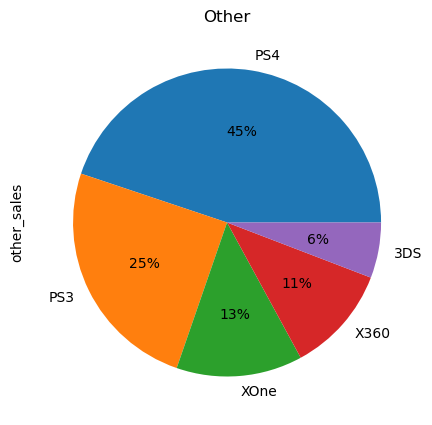

In [76]:
na_sales = predict_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_sales.plot(kind='pie',y='na_sales', autopct='%1.0f%%', legend=False, title = 'NA', figsize=(5, 5))

eu_sales = predict_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_sales.plot(kind='pie',y='eu_sales', autopct='%1.0f%%', legend=False, title = 'EU', figsize=(5, 5))

jp_sales = predict_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_sales.plot(kind='pie',y='jp_sales', autopct='%1.0f%%', legend=False, title = 'JP', figsize=(5, 5))

other = predict_data.pivot_table(index='platform', values='other_sales', aggfunc='sum').nlargest(5, 'other_sales')
other.plot(kind='pie',y='other_sales', autopct='%1.0f%%', legend=False, title = 'Other', figsize=(5, 5))


In [77]:
predict_data['rating'] = predict_data['rating'].fillna("no_rating")

C:\Users\79263\AppData\Local\Temp\ipykernel_24212\628044885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['rating'] = predict_data['rating'].fillna("no_rating")


<AxesSubplot:title={'center':'Other rating'}, ylabel='other_sales'>

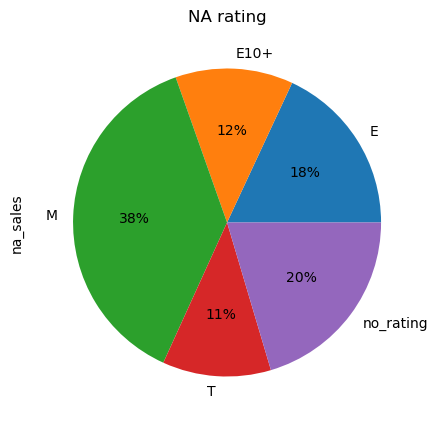

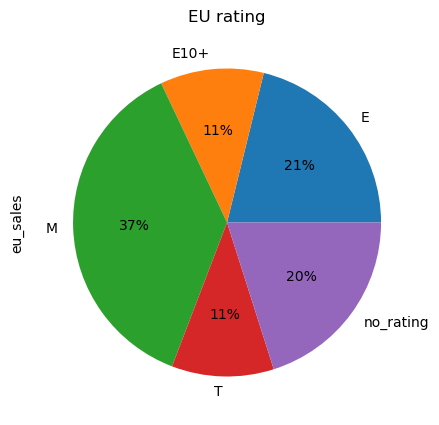

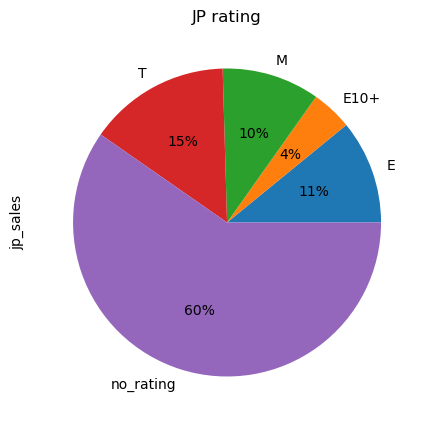

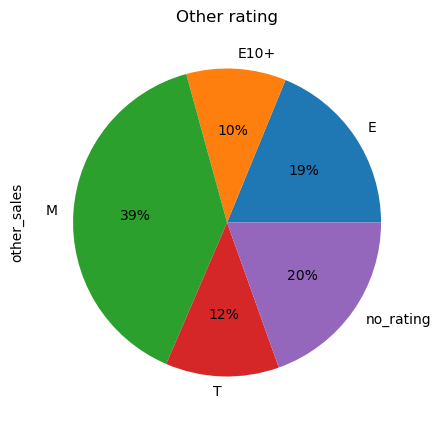

In [78]:
na_rating = predict_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_rating.plot(kind='pie',y='na_sales', autopct='%1.0f%%', legend=False, title = 'NA rating', figsize=(5, 5))

eu_rating = predict_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_rating.plot(kind='pie',y='eu_sales', autopct='%1.0f%%', legend=False, title = 'EU rating', figsize=(5, 5))

jp_rating = predict_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_rating.plot(kind='pie',y='jp_sales', autopct='%1.0f%%', legend=False, title = 'JP rating', figsize=(5, 5))

other_rating = predict_data.pivot_table(index='rating', values='other_sales', aggfunc='sum')
other_rating.plot(kind='pie',y='other_sales', autopct='%1.0f%%', legend=False, title = 'Other rating', figsize=(5, 5))


ПО рейтингу ESRB можно сказать следующее:
На рынке Северной Америки больше всего продаж у игр для взрослых (рейтинг М), 38%, далее идут игры без рейтинга - у них 20% продаж, у игр с рейтингом Е-"для всех"- 18% у игр с рейтингом "для всех старше 10 лет" (Е10+)количество продаж 12% и для подростков (рейтинг Т)- 11%

На рынке Европы больше всего продаж также у игр для взрослых(рейтинг М) - 37%, на втором месте у игр "для всех" (рейтинг Е) - 21%, на третьем месте игры без рейтинга 20%, на четвертом - игры для подростков (рейтинг Т) и "для всех старше 10 лет" (Е10+)-по 11%.

На рынке Японии большинство продаж приходится на игры без рейтинга- 60%. Далее игры для подростков (рейтинг Т)- 15%, игры для всех (рейтинг Е)- 11%, игры для взрослых- 10% и "для всех старше 10 лет" (Е10+)-4%.

Для остальных регионов продажи распределились так: игры для взрослых -39%, игры без рейтинга- 20%, игры для всех- 19%, игры для подростков- 12%, игры для всех старше 10 лет- 10%


Такой результат возможен из-за того, что не все игры подаются на присвоение данного рейтинга, поэтому у многих его нет. Особенно на рынке Японии



In [79]:
temp = good_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

6676 0.40598394551204087


E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

***ЭТАП 4- проверка статистических гипотез***

Гипотеза 1 : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нам нужно узнать, есть ли статистически значимая разница между средними пользовательскими ретингами платформ Xbox One и PC. 
Нулевая гипотеза (в которой мы должны указать равенство двух выборок)будет звучать так:
Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC
Альтернативная гипотеза (в которой мы должны указать, что выборки не равны):
Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC

In [80]:
not_null = predict_data[predict_data['user_score'].isnull()== False]
xone_data = not_null.query('platform=="XOne"')['user_score']
pc_data = not_null.query('platform=="PC"')['user_score']

In [81]:
alpha=0.05
results = st.ttest_ind(xone_data,pc_data)
print ('р-значение:', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую теорию')
else:
    print('Нулевую теорию отвергнуть не получилось')

р-значение: 0.14012658403611647
Нулевую теорию отвергнуть не получилось


Вероятность получить одинаковые средние по пользовательскому рейтингу у двух платформ достаточно велика, и можно утвержать, что рейтинги платформ Xbox One и РС равны.


In [82]:
not_null = predict_data[predict_data['user_score'].isnull()== False]
two_platform = not_null[['platform','user_score']].copy()
two_platform = two_platform.loc[(two_platform['platform']=="XOne")|(two_platform['platform']=="PC")]


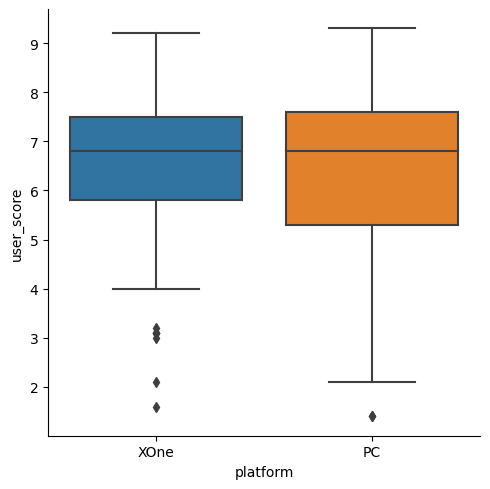

In [83]:
sns.catplot( x='platform', y='user_score',kind='box', data=two_platform, height=5);

Следующая гипотеза:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [84]:
action_data = not_null.query('genre=="Action"')['user_score']
sport_data = not_null.query('genre=="Sports"')['user_score']

In [85]:
alpha=0.05
results = st.ttest_ind(action_data,sport_data)
print ('р-значение:', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую теорию')
else:
    print('Нулевую теорию отвергнуть не получилось')

р-значение: 1.8791962987532298e-27
Отвергаем нулевую теорию


Как и с гипотезой выше я использовала гипотезу сравнения средних двух генеральных совокупностей по выборке.
Во втором случае р-значение получилось малым, поэтому мы говорим, что рейтинги жанров Action и Sports имеют статистически значимые различия.

In [86]:
not_null = predict_data[predict_data['user_score'].isnull()== False]
two_genres = not_null[['genre','user_score']].copy()
two_genres = two_genres.loc[(two_genres['genre']=="Action")|(two_genres['genre']=="Sports")]


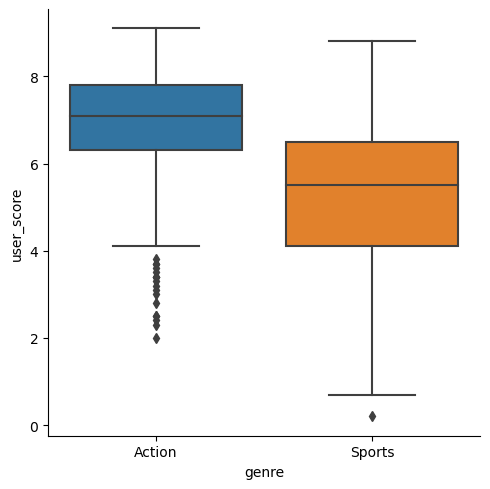

In [87]:
sns.catplot( x='genre', y='user_score',kind='box', data=two_genres, height=5);

***ЭТАП 5- ВЫВОД***

По итогу проведенного анализа можно сказать следующее:
Начиная с 2008 года идет спад продаж игр на всех игровых платформах. ПОэтому, вероятнее всего,в 2017 году тенденция сохранится.
Средняя продолжительность жизни платформы- примерно 7 лет.

На данный момент на рынке действуют 9 игровых платформ: 'PSV','WiiU','XOne','PC','3DS','PS4','PS3','Wii','X360'.
Наилучшие показатели по количествам продаж у платформ PS4, XOne. У них продажи показывают рост за 2015 и 2106 года- 118,90 млн и 69,25 млн. У XOne продажи 60.14млн в 2015 году и 26.15 в 2016 году. 

Также можно расмотреть платформы WiiU, PSV, PC. Лучше всего продажи идут на платформе WiiU - 16,35 в 2015 году и 4,6 в 2016. У платформ PC и PSV продажи в районе 7 млн. за 2015 год и около 4 за 2016 года.  Это платформы, у которых нет явного падения и на данный момент их продажи находятся на определенном плато или пике. 

В отношении влияния отзывов пользователей и критиков на продажи - взаимосвязи обнаружены не были. Коэффициент корреляции слабый. 

Жанры.

Самыми популярными топ-5 жанрами по сумме продаж являются Action, Shooter, Sports,Role-Playing, и Misc.У них наибольшее количество продаж в сумме. а вот в антирейтинг-5 входят пазлы, стратегии, бродилки, симуляторы, и сражения. Меньше всего поклонников у пазлов.

Но по медианным количествам продаж лидируют Shooter, на втором месте с большим отрывом Sports, далее Platform, Role-Playing, и Racing. Т.е. это наиболее стабильно продающиеся жанры на всех платформах.



Рассматривая отдельно продажи по каждому региону можно сделать следующие выводы:


1. Жанры. В Серевной Америке на первом месте шутеры, на втором- экшен, далее- спортивные игры, ролевые и категории "другие". В Европе и других регионах предпочтения по жанрам оказались одинаковыми по первым 4 местам. На первом месте игры жанра экшен, на втором- шутеры, на третьем- спорт, на четвертом -ролевые игры, а на пятом месте у рынка Европы гонки, а у других регионов- игры категории "другие".


Иная картина на рынке Японии. Там на первое место выходит жанр ролевых игр, на втором месте - экшен игры, с большим отрывом на третьем месте - сражения, на четвертом- игры категории"другие" и на пятом- шутеры.

Такие различия в жанрах можно объяснить особенностью среды и культуры. 

2. По платформам.

На рынках Северной Америки, Европы и других, самой популярной платформой является PS4. Она занимает большую часть рынков- 34,7, 48,04 и 54,49%. На втором месте платформа XOne- 28,61% на рынке Северной Америки, 17,08% на рынке Европы и 15,34% на рынке остальных регионов.

На рынке Латинской Америки 3 место занимает платформа X360= 9,96%, 4 - 3DS=7,97%, 5 место у платформы PS3 = 7,76%
На рынке Европы 3 место занимает платформа PS3= 9,43%, 4 - PC=6,64%, 5 место у платформы 3DS = 5,96%
На рынке остальных регионов 3 место занимает платформа PS3= 11,48%, 4 - X360=5,33%, 5 место у платформы 3DS = 4,51%


На рынке Японии ситуация немного другая. PS4 занимает второе место и 16,13%, уступая конкуренту 3DS- 47.52%. На третьем месте платформа PSV- 15,62%, на четвертом платформа PS3 = 12,05%, на пятом- платформа WiiU=7,85%


3.Рейтинг ESRB.
На рынке Северной Америки больше всего продаж у игр для взрослых (рейтинг М), 38%, далее идут игры без рейтинга - у них 20% продаж, у игр с рейтингом Е-"для всех"- 18% у игр с рейтингом "для всех старше 10 лет" (Е10+)количество продаж 12% и для подростков (рейтинг Т)- 11%

На рынке Европы больше всего продаж также у игр для взрослых(рейтинг М) - 37%, на втором месте у игр "для всех" (рейтинг Е) - 21%, на третьем месте игры без рейтинга 20%, на четвертом - игры для подростков (рейтинг Т) и "для всех старше 10 лет" (Е10+)-по 11%.

На рынке Японии большинство продаж приходится на игры без рейтинга- 60%. Далее игры для подростков (рейтинг Т)- 15%, игры для всех (рейтинг Е)- 11%, игры для взрослых- 10% и "для всех старше 10 лет" (Е10+)-4%.

Для остальных регионов продажи распределились так: игры для взрослых -39%, игры без рейтинга- 20%, игры для всех- 19%, игры для подростков- 12%, игры для всех старше 10 лет- 10%


Такой результат возможен из-за того, что не все игры подаются на присвоение данного рейтинга, поэтому у многих его нет. Особенно на рынке Японии



По итогу статистической проверки двух гипотез можно сказать следующее:
1. Вероятность получить одинаковые средние по пользовательскому рейтингу у двух платформ достаточно велика, и можно утвержать, что рейтинги платформ Xbox One и РС равны.

2. Во втором случае р-значение получилось малым, поэтому мы говорим, что рейтинги жанров Action и Sports имеют статистически значимые различия.